# 参数估计
## 点估计实现

点估计是用样本数据估计总体参数（如均值、方差）的过程。在Python中，我们通常使用NumPy库来快速计算这些统计量。


In [1]:
# 示例代码：计算样本均值和方差

import numpy as np

# 示例数据
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# 计算样本均值
mean = np.mean(data)
print("样本均值：", mean)

# 计算样本方差
variance = np.var(data, ddof=1)  # ddof=1 提供无偏估计
print("样本方差：", variance.round(2))

样本均值： 5.5
样本方差： 9.17


### 总体方差与样本方差
总体方差是所有总体成员的方差，通常是未知的。样本方差是基于样本成员来估计总体方差的一种方法。在统计学中，为了使样本方差成为总体方差的无偏估计，我们需要稍微调整计算方式。

### 无偏估计
在计算方差时，默认情况下（`ddof=0`），NumPy的 `var` 函数计算的是所谓的“总体方差”的估计，即：
$$
\text{方差} = \frac{\sum (x_i - \overline{x})^2}{n}
$$
其中，$x_i$是单个样本值，$\overline{x}$是样本均值，$n$是样本大小。

但是，这种计算方式在估计总体方差时通常会低估真实的方差，因为它以样本均值为基准，而不是总体均值。为了得到一个无偏的估计，我们使用 `ddof=1`，这样计算公式变为：
$$
\text{方差} = \frac{\sum (x_i - \overline{x})^2}{n-1}
$$
这里$n-1$是自由度的调整。自由度是指在计算统计量时，数据中独立值的数量。当我们用样本均值替代总体均值时，样本中的一个值会减少一个自由度（因为样本均值已经使用了一个自由度来估计总体均值）。

### 结果的影响
使用 `ddof=1` 会使方差估计稍微增大，但这样的估计在统计上是无偏的，更能准确地反映总体的真实方差。对于大样本而言，$n$和$n-1$之间的差别不大，但对于小样本数据，这种调整尤为重要。

因此，在进行统计分析时，特别是当样本数据用于估计总体参数时，推荐使用 `ddof=1` 来计算样本方差。


## 区间估计实现

区间估计不仅给出估计值，还提供该估计的可信度（通常以置信区间的形式呈现）。在Python中，`scipy.stats`库提供了多种函数来计算不同参数的置信区间。




In [2]:
# 计算均值的95%置信区间

import numpy as np
from scipy import stats

data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# 计算均值的95%置信区间
ci = stats.t.interval(
    confidence=0.95, df=len(data) - 1, loc=np.mean(data), scale=stats.sem(data)
)

print(f"均值是{data.mean():.2f}")
print("均值的95%置信区间：", [round(x, 2) for x in ci])

均值是5.50
均值的95%置信区间： [3.33, 7.67]


### `stats.t.interval` 函数解释

`stats.t.interval` 函数用于计算t分布的置信区间。此函数常用于统计学中的区间估计，特别是当样本量较小时或总体标准差未知时。以下是该函数的主要参数：

- **`confidence`**: 置信水平，表示置信区间包含总体参数真值的概率。例如，`confidence=0.95` 表示95%的置信水平。
- **`df`**: 自由度，通常是样本大小减一（n-1）。
- **`loc`**: 置信区间中心的位置，通常是样本均值。
- **`scale`**: 置信区间的比例因子，通常是样本的标准误。

### `stats.sem` 函数解释

`stats.sem` 函数计算给定数据的标准误差（Standard Error of the Mean, SEM）。标准误是样本均值的标准差估计，用于表示均值估计的精确度。它是用来计算均值置信区间的常用统计量。参数如下：

- **`a`**: 输入数组，即数据样本。
- **`axis`**: 计算用的轴。默认为0，表示沿第0轴（或沿每列）计算。
- **`ddof`**: Delta Degrees of Freedom。在计算样本标准差时使用，通常设置为0。但如果要得到用于估计总体参数的无偏标准差，应设为1。
- **`nan_policy`**: 定义如何处理NaN值。选项包括`'propagate'`（返回NaN），`'raise'`（抛出错误），或`'omit'`（忽略NaN值）。

通过这些函数和参数，你可以准确地计算并理解用于估计总体均值的95%置信区间的基础。

## 参数估计的案例

使用 `seaborn` 库自带的 `tips` 数据集来进行点估计和区间估计的计算，并绘制相关的图表。这个数据集包含餐厅小费的信息，其中包括总账单金额、小费金额、性别、是否吸烟、星期几、用餐时间和人数等信息。

### 案例目标
1. **计算小费金额的平均值作为点估计。**
2. **计算平均小费金额的95%置信区间作为区间估计。**
3. **绘制小费金额的分布图，并标注平均值和置信区间。**

### Python代码的实现

In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 加载数据
tips = sns.load_dataset("tips")

# 查看数据结构
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


接着，进行点估计和区间估计的计算：

In [4]:
# 点估计：计算小费的平均值
mean_tip = np.mean(tips["tip"])
print(f"小费的平均值为：{mean_tip:.2f}")

# 区间估计：计算平均小费的95%置信区间
ci_95 = stats.t.interval(
    confidence=0.95, df=len(tips["tip"]) - 1, loc=mean_tip, scale=stats.sem(tips["tip"])
)
print(f"平均小费的95%置信区间为：{ci_95[0]:.2f} 到 {ci_95[1]:.2f}")

小费的平均值为：3.00
平均小费的95%置信区间为：2.82 到 3.17


最后，绘制小费金额的分布图，并标注平均值和置信区间：

In [5]:
# 以下是绘图的前置代码，可以解决中文乱码等问题，拷贝执行即可

sns.set_theme()

plt.rcParams["font.sans-serif"] = [
    "Microsoft YaHei"
]  # 设置字体。如果不设置，中文会乱码。这里采用微软雅黑'Microsoft YaHei'，如果显示不正常，也可以使用黑体'SimHei'或者宋体'SimSun'等
plt.rcParams["axes.unicode_minus"] = False  # 该语句解决图像中的“-”负号的乱码问题

# 绘图使用'svg'后端：svg是矢量格式，可以任意缩放均保持清晰，各种屏幕的显示良好。
%config InlineBackend.figure_formats = ['svg']

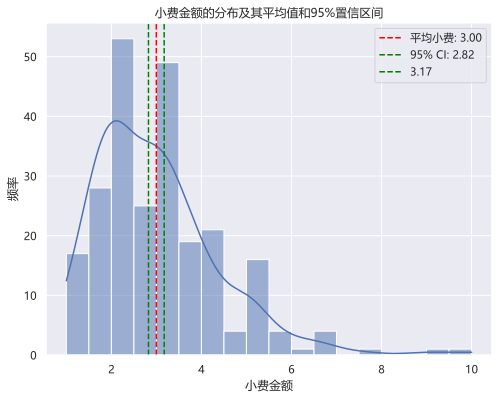

In [6]:
# 绘制小费金额的直方图

# 创建一个图形框架，设置大小
plt.figure(figsize=(8, 6))

# 绘制小费金额的直方图，并添加核密度估计（KDE）曲线
sns.histplot(tips["tip"], kde=True)

# 添加一条红色虚线，表示小费金额的平均值
plt.axvline(mean_tip, color="red", linestyle="--", label=f"平均小费: {mean_tip:.2f}")

# 添加绿色虚线，表示95%置信区间的下限
plt.axvline(ci_95[0], color="green", linestyle="--", label=f"95% CI: {ci_95[0]:.2f}")

# 添加绿色虚线，表示95%置信区间的上限
plt.axvline(ci_95[1], color="green", linestyle="--", label=f"{ci_95[1]:.2f}")

# 添加图例，以帮助解释图中的各个线条
plt.legend()

# 设置图的标题
plt.title("小费金额的分布及其平均值和95%置信区间")

# 设置x轴的标签
plt.xlabel("小费金额")

# 设置y轴的标签
plt.ylabel("频率")

# 显示图形
plt.show()